# CAPM:Capital asset pricing model

CAPM, abbreviated from Capital Asset Pricing Model, is a mathematical model that estimates the risk-return profile related to the market and expected return by analyzing long-term historical data. 

We introduce this model here so as to make an overview of our candidate stocks from previous analyses (Dupont Analysis).

In [1]:
from function.func import load_ERm,load_ERi,load_Rf
from function.func import Capm_model
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

/opt/anaconda3/envs/stock/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


## Profile of target stocks

From previous steps, we selected the stocks with less fluctuation and rather high (positive) ROE. 

In [2]:
# list the candidate stock
candidates = ['2330','2395','9910'] 

Draw graphs for the trend and the correlation between **return rate of market (ERm)** and **return rate of investment (ERi)**.

1. Line graph for each `candidate stock` along with `ETF0050`. 

2. Scatter plot `ERi` (x-axis) and `ERm` (y-axis)

ERm loading...
Rf loading...
ERi - 2330 loading...


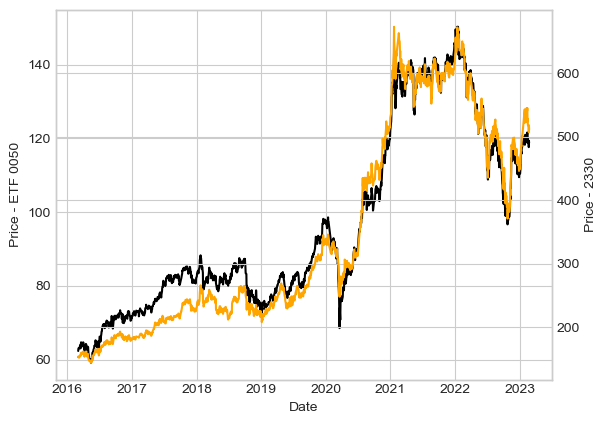

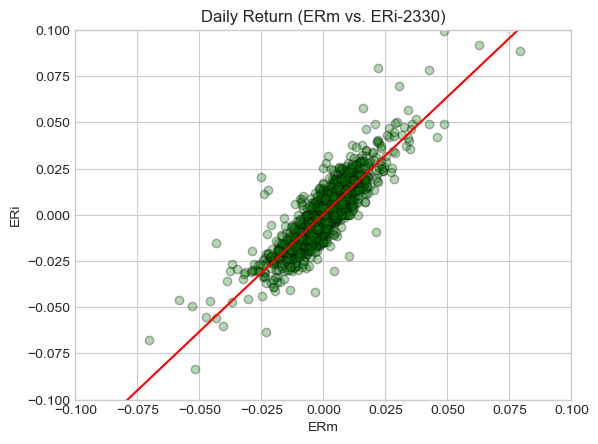

ERm loading...
Rf loading...
ERi - 2395 loading...


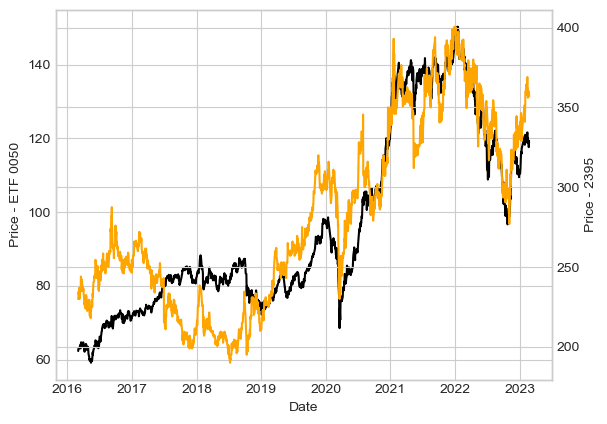

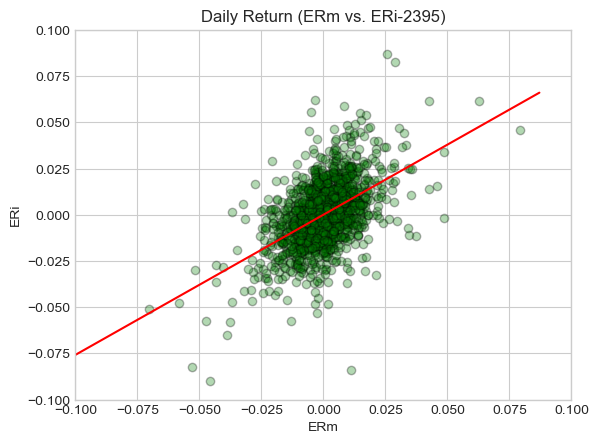

ERm loading...
Rf loading...
ERi - 9910 loading...


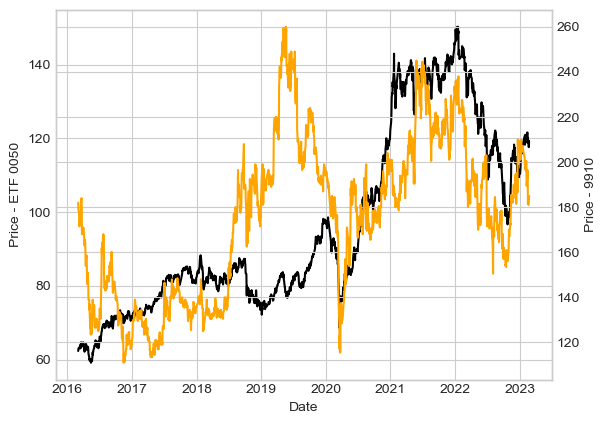

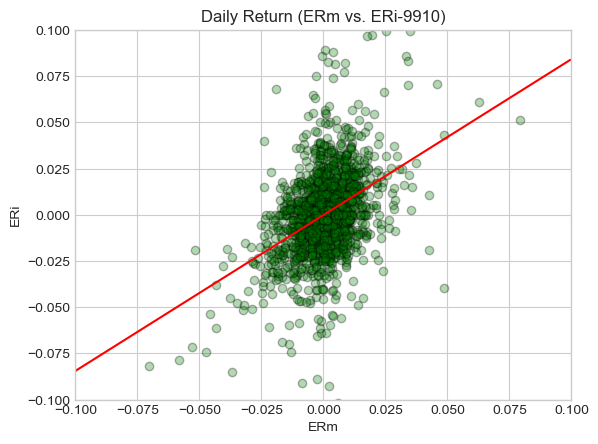

In [3]:
capm_results = pd.DataFrame()
div_df = pd.DataFrame()
for candidate in candidates:
    capm_result, df_all, div_df_can = Capm_model(candidate)
    capm_results = pd.concat([capm_results,capm_result],axis = 0)
    div_df = pd.concat([div_df,div_df_can],axis = 1)

    # Plot the result
    plt.style.use("seaborn-whitegrid")

    fig,ax = plt.subplots()
    plt.xlabel('Date')
    plt.ylabel('Price')
    ax.plot(df_all.date, df_all.price_etf0050,color ='black')
    plt.ylabel('Price - ETF 0050')
    ax2=ax.twinx()
    ax2.plot(df_all.date, df_all[f'price_{candidate}'],color = 'orange')
    plt.ylabel(f'Price - {candidate}')
    #plt.savefig(f'img/trend_{candidate}_CAPM.png',dpi=300)
    plt.show()
    
    
    ERm = df_all.eft0050
    Rf = df_all.us_bond
    ERi = df_all[f'daily return {candidate}']
    # Initialize layout
    fig, ax = plt.subplots()
    
    # Add scatterplot
    ax.scatter((ERm- Rf),(ERi- Rf),color='green',alpha=0.3,edgecolors="k")

    b, a = np.polyfit((ERm- Rf),(ERi- Rf), deg=1)
    
    # Create sequence of 100 numbers from 0 to 100
    ER = np.append((ERm- Rf).values,(ERi-Rf).values)
    xseq = np.linspace(np.min(ER), np.max(ER), num=100)

    # Plot regression line
    ax.plot(xseq, a + b * xseq, color="r")
    plt.xlabel('ERm')
    plt.ylabel('ERi')
    plt.title(f'Daily Return (ERm vs. ERi-{candidate})')
    plt.xlim(-0.1,0.1)
    plt.ylim(-0.1,0.1)
    #plt.savefig(f'img/scatterplot_{candidate}_CAPM.png',dpi=300)
    plt.show()

## Comparision of CAPM's characteristics among different target stocks

In [4]:
capm_results

,Stock ID,beta,alpha,r_value,p_value,std_err,expected_return_mean,risk_free_asset_mean
0,2330,1.270621,0.000310,0.875719,0.000000e+00,0.017309,0.000378,0.000084
0,2395,0.758353,0.000036,0.502703,9.548363e-106,0.032222,0.000378,0.000084
0,9910,0.843524,-0.000130,0.417014,5.281438e-70,0.045426,0.000378,0.000084


## Another question? 

Every stock in Taiwan has **Ex-Dividends**. The return from ex-dividends is also crucial to understand the profile of each stock. How should we include the return and also prevent it from influencing our CAPM model?

In [5]:
div_df = div_df.T.drop_duplicates().T
div_df

,ERm,2330,2395,9910
2011,3.64,4.14,3.50,6.38
2012,3.50,3.56,4.68,5.98
2013,2.30,2.73,3.11,3.41
2014,2.38,2.20,1.88,3.82
2015,3.03,3.08,2.82,1.81
2016,1.22,3.77,2.52,2.99
2017,3.17,3.23,2.59,3.70
2018,3.34,3.52,3.42,3.07
2019,3.86,4.70,2.57,2.83
2020,3.87,2.79,2.25,2.01
